## New Measure - Milks for Cow's Milk Protein Allergy

### Rationale

Prescribing costs for special milks for babies with Cow's Milk Protein Allegy have been increasing over time.  It is thought that only about 10% of patients requiring special milks require the more expensive Amino Acid Formula (AAF), rather than the 1st line Extensively Hydrolysed Formula (EHF).  It is also important that patients are reviewed regularly to ensure that treatment is still required.

### Proposed Measure

There are two proposed new measures:

1)  Cost of milk formulae for Cow's Milk Protein Allergy per 1000 patients aged 0-5

2)  Percentage items for Amino Acid Formula (AAF) vs AAF and Extensively Hydrolysed Formula (EHF)

### Numerators and Denominators

Unfortunately there are neither hierarchical BNF codes or a suitable DM+D hierarchy to produce these measures.  One option is to search for all brand names of manufacturers of these products, and manually classify the items as either "AAF", "EHF", or discard.  It is better to use this whitelisting option, rather than include everything made by these manufacturers, as this is open to more risk.  This measure will need to be subject to regular review, as the search has already shown that there are name changes and new products on the market which won't be picked up automatically.

The original search was undertaken on the following brand names:

```
'%Althera%'

'%Neocate%'

'%Aptamil%'

'%Similac%'

'%Nutramigen%'

'%Alfamino%'

'%Pepti-Junior%'

'%Pregestimil%'
```

This was found from sources including emails from Chris van Tulleken and PrescQIPP articles.

A total of 25 products was found and classified:

| bnf_code        | bnf_name                                 | type |
|-----------------|------------------------------------------|------|
| 090401000BBNQA0 | Neocate LCP_Pdr                          | AAF  |
| 090401000BBNBA0 | Neocate Active_Pdr Sach 63g (Unflav)     | AAF  |
| 090401000BBNMA0 | Nutramigen PurAmino_Pdr                  | AAF  |
| 090401000BBNMA0 | Nutramigen AA LIPIL_Pdr                  | AAF  |
| 090401000BBJFA0 | Neocate Advance_Pdr Sach 100g (Unflav)   | AAF  |
| 090900000BBKWA0 | SMA Alfamino_Pdr                         | AAF  |
| 090401000BBNAA0 | Neocate Active_Pdr Sach 63g (Blkcurrant) | AAF  |
| 090401000BBQTA0 | Neocate Spoon_Pdr                        | AAF  |
| 090401000BBLDA0 | Neocate Advance_Pdr Sach 50g (Flav)      | AAF  |
| 090401000BBVKA0 | Neocate Syneo_Pdr                        | AAF  |
| 090401000BBVNA0 | Neocate Spoon_Pdr Sach 37g               | AAF  |
| 090401000BBPPA0 | Neocate Nutra_Pdr                        | AAF  |
| 090401000BBLPA0 | Nutramigen 2 LIPIL_Pdr                   | EHF  |
| 090401000BBLUA0 | Nutramigen 1 LIPIL_Pdr                   | EHF  |
| 090402000BBNZA0 | Milupa_Aptamil Pepti 1 (Allergy) Pdr     | EHF  |
| 090402000BBTQA0 | Milupa_Aptamil Pepti 2 (Allergy) Pdr     | EHF  |
| 090401000BBTGA0 | Nutramigen 1 + LGG_Pdr                   | EHF  |
| 090401000BBTHA0 | Nutramigen 2 + LGG_Pdr                   | EHF  |
| 090900000BBKRA0 | Similac Alimentum_Pdr                    | EHF  |
| 090402000BBNZA0 | Aptamil_Pepti 1 Pdr                      | EHF  |
| 090402000BBTQA0 | Aptamil_Pepti 2 Pdr                      | EHF  |
| 090900000BBKQA0 | SMA Althera_Pdr                          | EHF  |
| 090401000BBDTA0 | Pregestimil LIPIL_Pdr                    | EHF  |
| 090401000BBUXA0 | Nutramigen 3 + LGG_Pdr                   | EHF  |
| 090900000BBKQA0 | Althera_Pdr                              | EHF  |

For the proportion query, products marked as "AAF" are the numerator, and "AAF" and "EHF" are the denominator.
For the cost per 1000 patients, all products are included.


### SQL and results

In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq

In [2]:
#obtain overall data for formulary prescribing at Guildford and Waveney CCG

sql = """
SELECT
  month,
  pct,
  SUM(CASE
      WHEN
      --this list is for AAF only
      bnf_code = '090401000BBNQA0' OR 
      bnf_code = '090401000BBNBA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBJFA0' OR 
      bnf_code = '090900000BBKWA0' OR 
      bnf_code = '090401000BBNAA0' OR 
      bnf_code = '090401000BBQTA0' OR 
      bnf_code = '090401000BBLDA0' OR 
      bnf_code = '090401000BBVKA0' OR 
      bnf_code = '090401000BBVNA0' OR 
      bnf_code = '090401000BBPPA0' 
      THEN items
      ELSE 0 END) AS aaf_items,
  SUM(CASE
      WHEN 
      bnf_code = '090401000BBNQA0' OR 
      bnf_code = '090401000BBNBA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBJFA0' OR 
      bnf_code = '090900000BBKWA0' OR 
      bnf_code = '090401000BBNAA0' OR 
      bnf_code = '090401000BBQTA0' OR 
      bnf_code = '090401000BBLDA0' OR 
      bnf_code = '090401000BBVKA0' OR 
      bnf_code = '090401000BBVNA0' OR 
      bnf_code = '090401000BBPPA0' 
      THEN actual_cost
      ELSE 0 END) AS aaf_cost,
  SUM(items) AS all_items,
  SUM(actual_cost) AS all_cost,
  IEEE_DIVIDE(SUM(CASE
        WHEN
      bnf_code = '090401000BBNQA0' OR 
      bnf_code = '090401000BBNBA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBJFA0' OR 
      bnf_code = '090900000BBKWA0' OR 
      bnf_code = '090401000BBNAA0' OR 
      bnf_code = '090401000BBQTA0' OR 
      bnf_code = '090401000BBLDA0' OR 
      bnf_code = '090401000BBVKA0' OR 
      bnf_code = '090401000BBVNA0' OR 
      bnf_code = '090401000BBPPA0' 
      THEN items
      ELSE 0 END), SUM(items)) AS aaf_percent_items,
  IEEE_DIVIDE(SUM(CASE
        WHEN
      bnf_code = '090401000BBNQA0' OR 
      bnf_code = '090401000BBNBA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBNMA0' OR 
      bnf_code = '090401000BBJFA0' OR 
      bnf_code = '090900000BBKWA0' OR 
      bnf_code = '090401000BBNAA0' OR 
      bnf_code = '090401000BBQTA0' OR 
      bnf_code = '090401000BBLDA0' OR 
      bnf_code = '090401000BBVKA0' OR 
      bnf_code = '090401000BBVNA0' OR 
      bnf_code = '090401000BBPPA0' 
      THEN actual_cost
      ELSE 0 END), SUM(actual_cost)) AS aaf_percent_cost
FROM
  `hscic.normalised_prescribing_standard`
WHERE
--this is all current and past AAF and EHF products prescribed, as of 2019-03-04
  bnf_code = '090401000BBNQA0'
  OR bnf_code = '090401000BBLPA0'
  OR bnf_code = '090401000BBLUA0'
  OR bnf_code = '090402000BBNZA0'
  OR bnf_code = '090402000BBTQA0'
  OR bnf_code = '090401000BBTGA0'
  OR bnf_code = '090401000BBTHA0'
  OR bnf_code = '090900000BBKRA0'
  OR bnf_code = '090402000BBNZA0'
  OR bnf_code = '090402000BBTQA0'
  OR bnf_code = '090401000BBNBA0'
  OR bnf_code = '090401000BBNMA0'
  OR bnf_code = '090401000BBNMA0'
  OR bnf_code = '090401000BBJFA0'
  OR bnf_code = '090900000BBKWA0'
  OR bnf_code = '090900000BBKQA0'
  OR bnf_code = '090401000BBNAA0'
  OR bnf_code = '090401000BBQTA0'
  OR bnf_code = '090401000BBDTA0'
  OR bnf_code = '090401000BBLDA0'
  OR bnf_code = '090401000BBVKA0'
  OR bnf_code = '090401000BBVNA0'
  OR bnf_code = '090401000BBUXA0'
  OR bnf_code = '090900000BBKQA0'
  OR bnf_code = '090401000BBPPA0'
GROUP BY
  month,
  pct
ORDER BY
  month
"""
cmpa_df = bq.cached_read(sql, csv_path='cmpa_df.csv')
cmpa_df['month'] = cmpa_df['month'].astype('datetime64[ns]')


### Increasing costs of CMPA

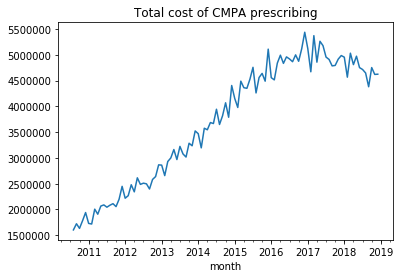

In [3]:
cmpa_df.groupby("month")['all_cost'].sum().plot(kind='line', title="Total cost of CMPA prescribing")

There has been a marked increase in the prescribing of CMPA, with nearly a four-fold increase since 2011.

### Variation

<module 'matplotlib.pyplot' from 'C:\\Users\\racro\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

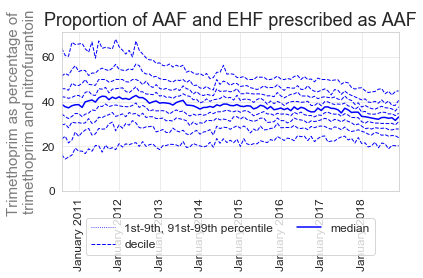

In [4]:
from ebmdatalab import charts

# make a datafrom with a date column and a values column

charts.deciles_chart(
        cmpa_df,
        period_column='month',
        column='aaf_percent_items',
        title="Proportion of AAF and EHF prescribed as AAF",
        show_outer_percentiles=False)


There is signficant variation in the proportion of AAF being prescribed. Considering that most guidance suggests approximately 10% of patients with CMPA require AAF, most CCGs appear to have over-prescribing.

In [5]:
cmpa_df.ftypes

month                datetime64[ns]:dense
pct                          object:dense
aaf_items                     int64:dense
aaf_cost                    float64:dense
all_items                     int64:dense
all_cost                    float64:dense
aaf_percent_items           float64:dense
aaf_percent_cost            float64:dense
dtype: object

In [6]:
sql2 = """
SELECT month, pct_id AS pct, (sum(male_0_4 + female_0_4)) as pt_0_4
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct
"""
pt_0_4_df = bq.cached_read(sql2, csv_path='pt_0_4_df.csv')
pt_0_4_df['month'] = pt_0_4_df['month'].astype('datetime64[ns]')

In [7]:
per_1000_df = pd.merge(cmpa_df, pt_0_4_df, on=['month', 'pct'])
per_1000_df['cost_per_1000'] = 1000* (per_1000_df['all_cost']/per_1000_df['pt_0_4'])

In [8]:
per_1000_df.head()

,month,pct,aaf_items,aaf_cost,all_items,all_cost,aaf_percent_items,aaf_percent_cost,pt_0_4,cost_per_1000
0,2014-01-01,11J,219,31997.76,581,49381.37,0.376936,0.647972,38565,1280.471153
1,2014-01-01,07Q,103,16309.14,275,26900.46,0.374545,0.606277,20949,1284.092797
2,2014-01-01,09W,83,14746.10,262,24684.00,0.316794,0.597395,18836,1310.469314
3,2014-01-01,05C,52,9316.34,115,12469.98,0.452174,0.747101,18197,685.276694
4,2014-01-01,04N,31,4675.73,84,7738.70,0.369048,0.604201,6589,1174.487783


<module 'matplotlib.pyplot' from 'C:\\Users\\racro\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

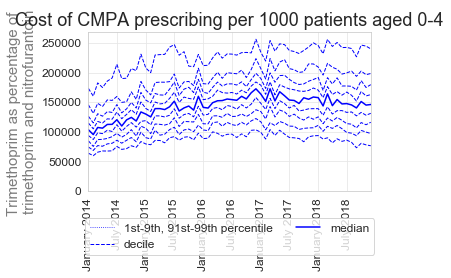

In [9]:
# make a datafrom with a date column and a values column

charts.deciles_chart(
        per_1000_df,
        period_column='month',
        column='cost_per_1000',
        title="Cost of CMPA prescribing per 1000 patients aged 0-4",
        show_outer_percentiles=False)